In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

/home/dluser1/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def data_prepare():
    # data prepare for LSTM model
    import pandas as pd
    # conda install -c anaconda pandas-datareader=0.4.0
    import pandas_datareader.data as web
    from datetime import datetime
    start=datetime(2007, 1, 1)
    end=datetime(2017, 1, 1)
    # yahoo API not working? so to google
    source='google'
    # google stock
    google = web.DataReader('GOOG', source, start, end)
    # print(type(google))
    # print(type(google['Low']))
    #<class 'pandas.core.series.Series'>
    # don't save pandas series of google['LOW'], just single row, see https://stackoverflow.com/questions/20845213/how-to-avoid-python-pandas-creating-an-index-in-a-saved-csv
    # hmmm... mainland of china block google....sorry
    google['Low'].to_csv('data/google.csv', sep='\t', encoding='utf-8', index=False)

In [3]:
#Step 0 prepare data
# data_prepare()
#see: http://www.jakob-aungiers.com/articles/a/LSTM-Neural-Network-for-Time-Series-Prediction
#see: impelemntation of https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('data/google.csv', 50, True)

In [4]:
X_train

array([[[ 0.00000000e+00],
        [-3.27274193e-02],
        [-1.01970900e-02],
        ...,
        [ 2.80964089e-01],
        [ 3.28725162e-01],
        [ 3.27838459e-01]],

       [[ 0.00000000e+00],
        [-7.73611111e-02],
        [-8.91666667e-02],
        ...,
        [ 2.32916667e-01],
        [ 2.74097222e-01],
        [ 2.41458333e-01]],

       [[ 0.00000000e+00],
        [ 1.82412484e-02],
        [ 1.88738929e-02],
        ...,
        [ 2.23674961e-01],
        [ 2.47328835e-01],
        [ 2.53479544e-01]],

       ...,

       [[ 0.00000000e+00],
        [ 5.23869254e-03],
        [ 2.13236922e-02],
        ...,
        [ 7.39688630e-02],
        [ 6.51885191e-02],
        [ 6.19788977e-02]],

       [[ 0.00000000e+00],
        [-2.63627200e-03],
        [ 1.80274482e-02],
        ...,
        [ 1.70155850e-01],
        [ 1.87059006e-01],
        [ 1.95239203e-01]],

       [[ 0.00000000e+00],
        [-4.40599645e-03],
        [ 1.97016102e-04],
        ...,
        

In [5]:
y_train

array([ 0.33585909,  0.22444444,  0.22676789, ...,  0.06013429,
        0.1710863 , -0.00077015])

In [6]:
# Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
#print 'compilation time : ', time.time() - start

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [7]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=20,
    validation_split=0.05)

Train on 2109 samples, validate on 111 samples
Epoch 1/20
2109/2109 [==============================] - 4s 2ms/step - loss: 0.0128 - val_loss: 0.0080
Epoch 2/20
2109/2109 [==============================] - 1s 592us/step - loss: 0.0037 - val_loss: 0.0032
Epoch 3/20
2109/2109 [==============================] - 1s 528us/step - loss: 0.0025 - val_loss: 0.0028
Epoch 4/20
2109/2109 [==============================] - 1s 525us/step - loss: 0.0023 - val_loss: 0.0037
Epoch 5/20
2109/2109 [==============================] - 1s 524us/step - loss: 0.0022 - val_loss: 0.0023
Epoch 6/20
2109/2109 [==============================] - 1s 544us/step - loss: 0.0019 - val_loss: 0.0032
Epoch 7/20
2109/2109 [==============================] - 1s 534us/step - loss: 0.0019 - val_loss: 0.0021
Epoch 8/20
2109/2109 [==============================] - 1s 549us/step - loss: 0.0016 - val_loss: 0.0024
Epoch 9/20
2109/2109 [==============================] - 1s 522us/step - loss: 0.0017 - val_loss: 0.0021
Epoch 10/20
2109/21

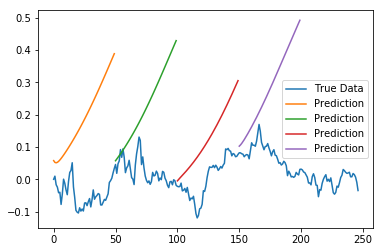

In [8]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)